# <center>Задача оптимизации
## <center>Функции активации
**Функция активации** нейрона определяет выходной сигнал, который, в свою очередь, определяется входным сигналом или набором входных сигналов. Функцию активации используют, чтобы получить выходные данные узла.

Функции активации делятся на два типа:
* линейные функции активации;
* нелинейные функции активации.

**Сигмоида (Sigmoid)** — возрастающая нелинейная функция, имеющая форму буквы «S». В нейронных сетях она используется потому, что позволяет усиливать слабые сигналы.

Проблемы *Sigmoid*-активации:
* Нейроны с сигмоидой могут насыщаться и приводить к угасающим градиентам.
* Не центрирована в нуле.
* Дорого вычислять.

![pasted image 0.png](<attachment:pasted image 0.png>)

**Функция Tanh** похожа на сигмоиду, но её преимущество состоит в том, что отрицательные входные данные будут отображаться строго отрицательными, а нулевые входные данные будут отображаться вблизи нуля.

Характеристики *Tanh* активации:
* центрирована в нуле;
* но все ещё как сигмоида.

![pasted image 0-2.png](<attachment:pasted image 0-2.png>)

**ReLU (rectified linear unit)** является наиболее часто используемой функцией активации в мире, так как она используется практически во всех свёрточных нейронных сетях или для Deep Learning.

Характеристики *ReLU* активации:
* быстро считается;
* градиенты не угасают при х > 0;
* не центрирована в нуле;
* если не было активации, не будет обновления. 

![pasted image 0-3.png](<attachment:pasted image 0-3.png>)

**Leaky ReLU** является попыткой решить проблему выхода *ReLU* из строя.

Характеристики *Leaky ReLU*-активации:
* всегда будут обновления;
* примерно центрирована в нуле;
* а ≠ 1.

![pasted image 0-4.png](<attachment:pasted image 0-4.png>)

**Функция активации ELU (Exponential Linear Unit)**, по результатам исследований, быстрее сводит к нулю и даёт более точные результаты.

В отрицательной части аргументов использует экспоненту.

![pasted image 0-5.png](<attachment:pasted image 0-5.png>)

Характеристики *ELU*:
* примерно центрирована в нуле;
* сходимость быстрее *ReLU*.

![pasted image 0-6.png](<attachment:pasted image 0-6.png>)
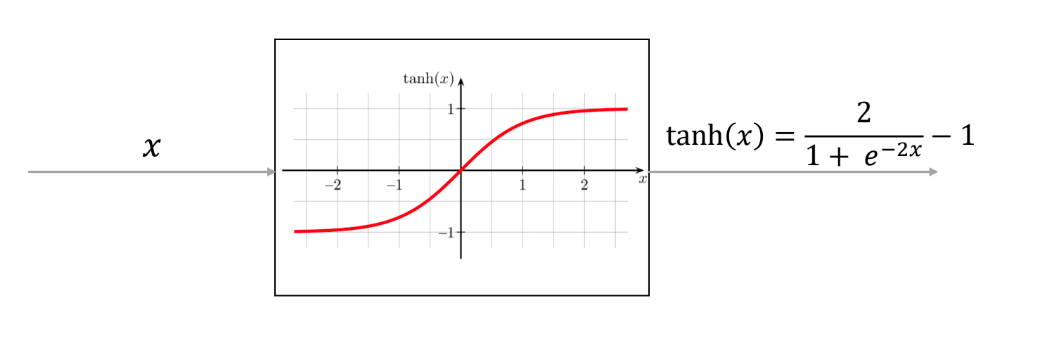
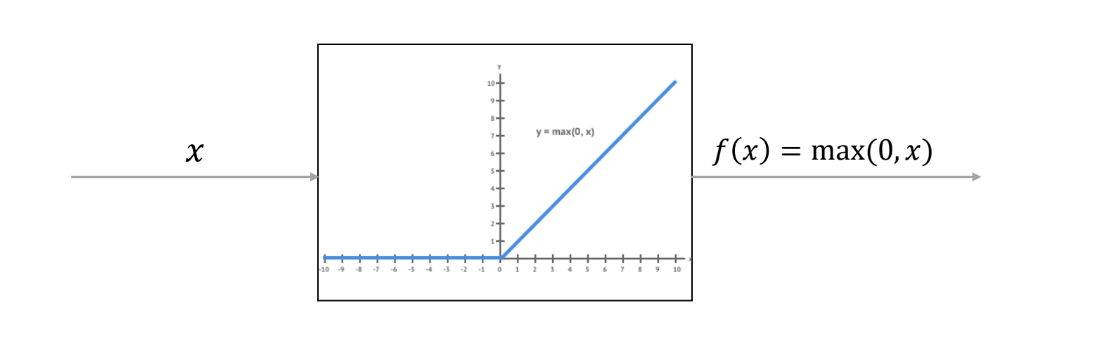
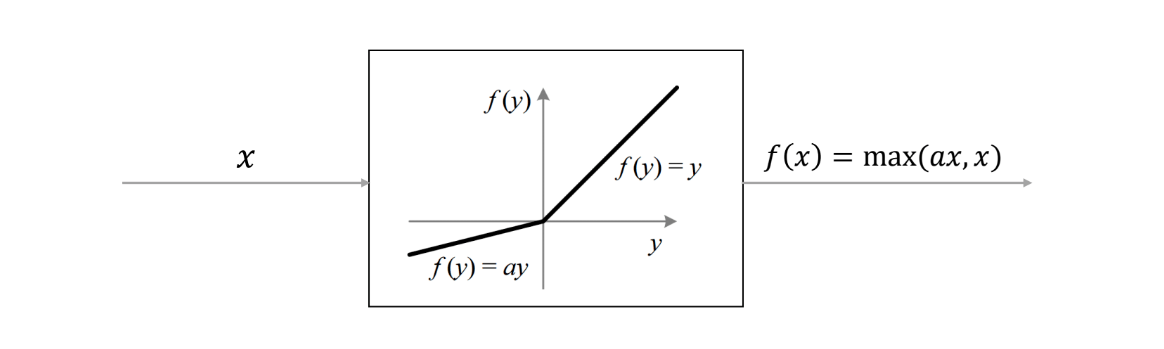
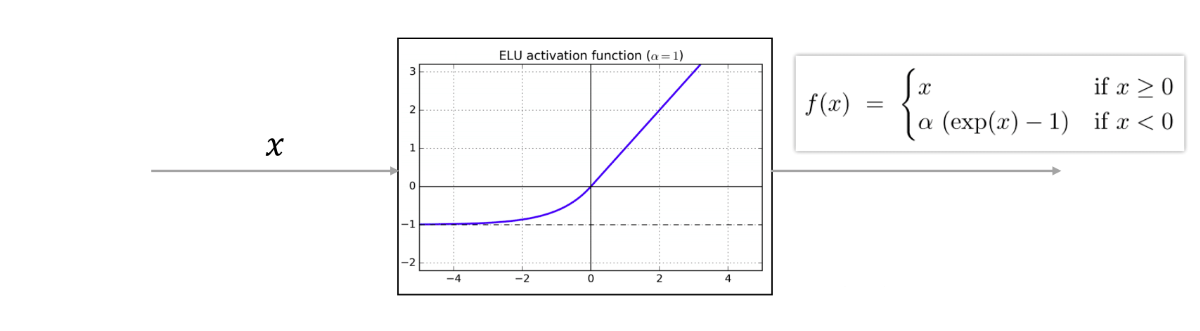
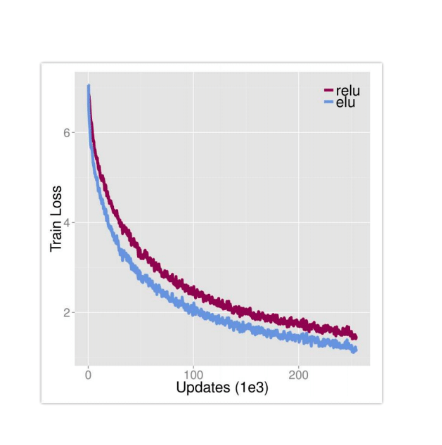
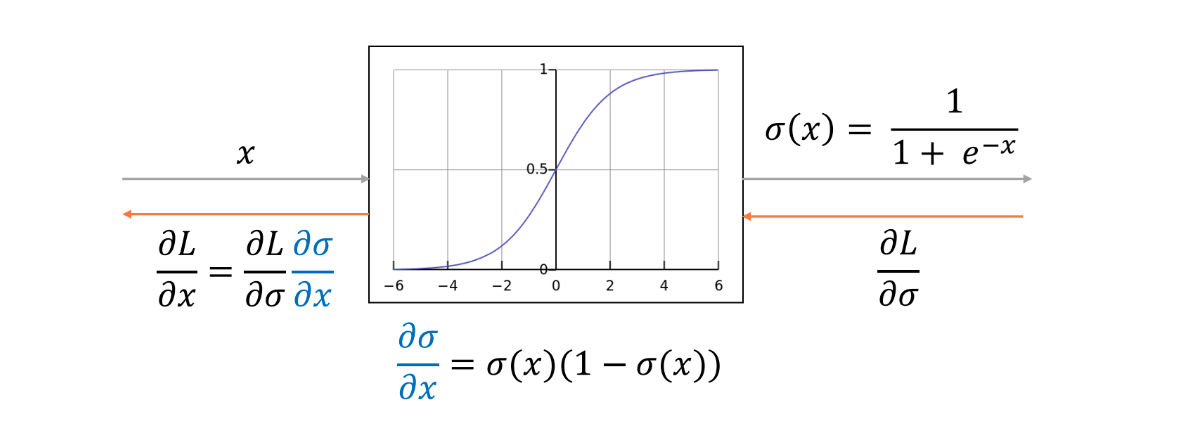

## <center>Инициализация весов
Нейронные сети нельзя инициализировать нулевыми весами, так как в этом случае появляется эффект симметрии и, как следствие, сеть становится менее мощной.

**Нейрон и дисперсия до активации**

Если у каждого входа нейросети среднее равно 0, и мы генерируем веса независимо от входов, то это нам гарантирует, что **среднее нейрона до активации тоже будет равно 0**. 

Но дисперсия может расти, и это замедлит сходимость.

![pasted image 0.png](<attachment:pasted image 0.png>)

**Дисперсия суммы некоррелированных величин** — это сумма дисперсий, слагаемые некоррелированы, потому что веса, которые мы генерируем, независимы.

**Сходимость**

Гиперболический тангенс для маленьких функций (около 0) похож на линейную функцию, то есть наши ранние выкладки примерно верны, и это означает, что, так как мы гарантируем одинаковую дисперсию на разных слоях нейросети, то выход будет распределён примерно одинаково после применения функции активации и, следовательно, градиенты будут в примерно одинаковом масштабе. Этот факт позволит ускорить сходимость.

![pasted image 0-2.png](<attachment:pasted image 0-2.png>)
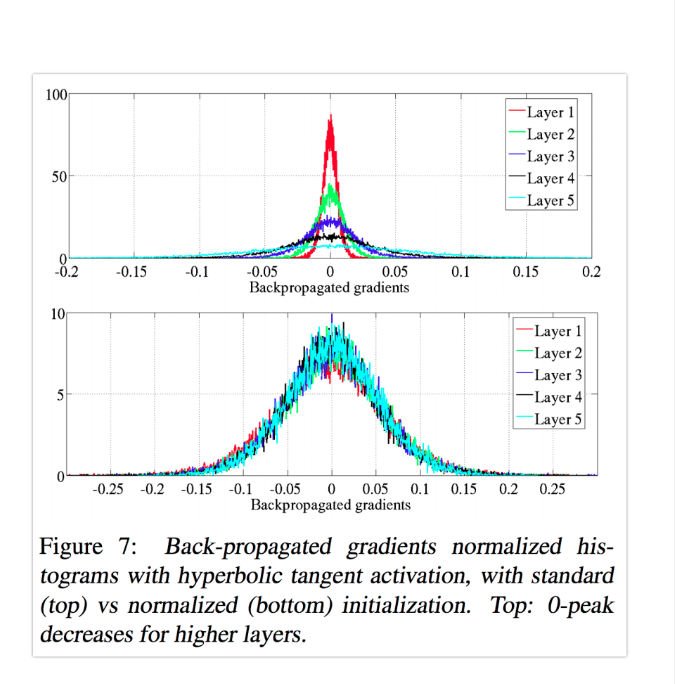
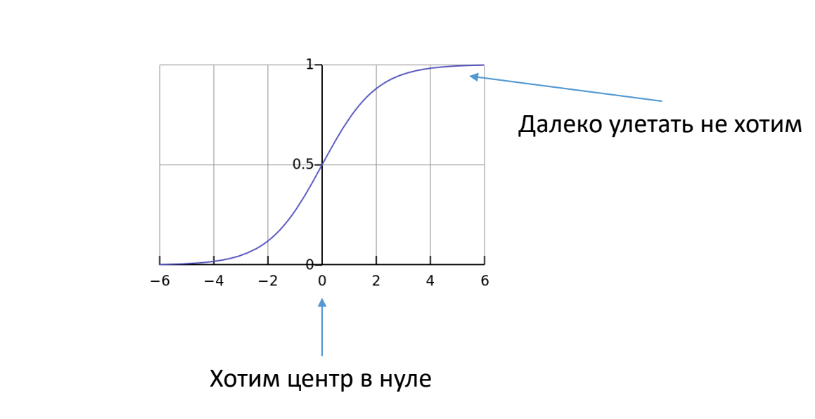

## <center>Batch-нормализация
После инициализации и запуска *backpropagation* нет гарантий, что дисперсия не будет расти. Для нормирования выходов нейронов (до и после активации) можно использовать **Batch-нормализацию**.

*Batch*-нормализация пытается нормировать каждый выход нейрона таким образом, чтобы у него были нулевое среднее и фиксированная дисперсия.

Экспоненциальное сглаживание работает следующим образом: когда мы получаем среднее по батчу и *Var* по батчу, мы добавляем их в накопитель с некоторым весом, а старое значение в накопителе немного дискаунтируем.

**Что делать с γ и β?**

**γ** и **β** нужны для масштабирования и сдвига активации: нейросети может быть полезно иметь, например,  не единичную дисперсию для какого-то нейрона, а большую, что поможет ей сойтись лучше.

Линейная комбинация каких-то других входов легко дифференцируется, поэтому эти коэффициенты можно добавить в  backpropagation, по ним будут считаться градиенты, и они будут автоматически подобраны.

## <center>Dropout-регуляризация
*Dropout*-регуляризация на каждом шаге *backpropagation* **семплирует сеть** и с вероятностью $р$ оставляет каждый нейрон, но с вероятность $1 - р$ заменяет его на $0$. Таким образом сеть подстраивается по частям.

![pasted image 0.png](<attachment:pasted image 0.png>)
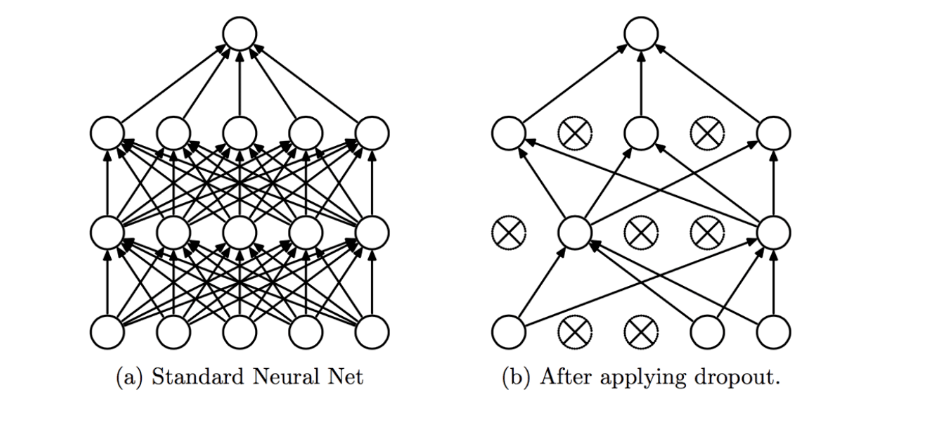

## <center>Производная функции
В зависимости от того, какую величину шага в градиетном спуске *learning rate* вы выберете (большую или маленькую), вариации градиетного спуска будут выглядеть по-разному:
* Если *learning rate* **слишком большой**, это означает, что сначала оптимизация была, но остановилась, и качество становится хуже, **мы выходим из оптимальной точки**.
* Если *learning rate* **слишком маленький**, то **обучение слишком медленное**.
* Если *learning rate* **недостаточно большой**, то поначалу обучение идёт отлично, а потом мы **застреваем и не двигаемся дальше**.
* Если *learning rate* **оптимальный**, то мы **обучаемся быстро вначале, и к концу мы выходим на оптимальную точку**.

![pasted image 0.png](<attachment:pasted image 0.png>)

**Почему стоит снижать learning rate с каждой итерацией?** Если уменьшить *learning rate*, когда вы увидели, что обучение больше не происходит, то сеть ещё чуть-чуть доучится.

Проблема градиентного спуска — он застревает в локальных минимумах.

![pasted image 0-2.png](<attachment:pasted image 0-2.png>)
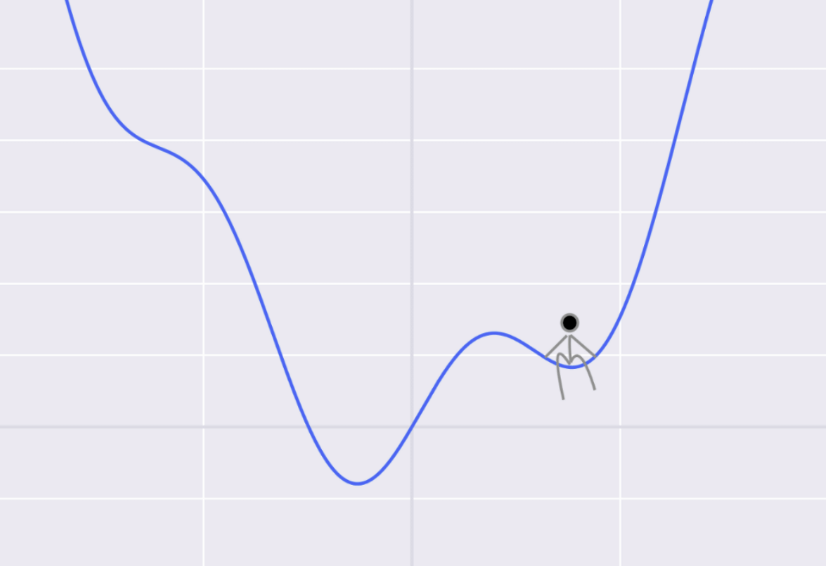
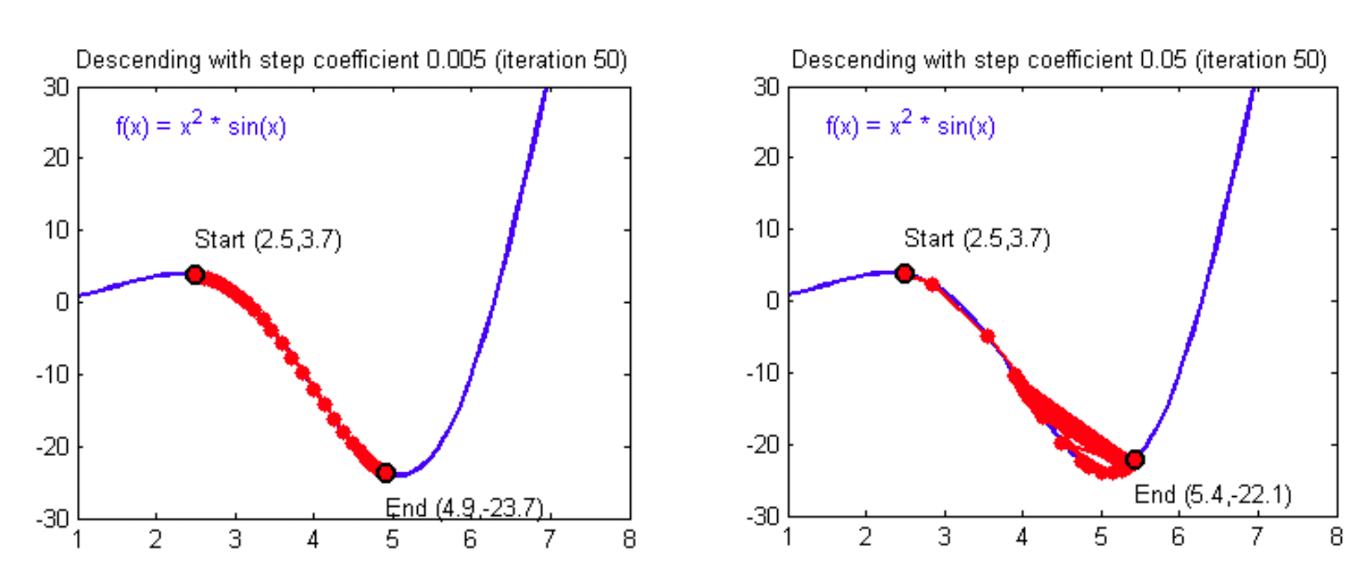

## <center>SGD
**Стохастический градиентный спуск (SGD)**  является итерационным методом оптимизации с дифференцируемой целевой функцией, суть градиентного спуска — минимизировать функцию, делая небольшие шаги в сторону наискорейшего убывания функции.

Плюсы *SGD*:
* позволяет быстрее делать шаги и быстрее сходиться;
* траектория становится более шумной, что помогает выпрыгивать из локальных оптимумов.

**RMSProp — адаптивный шаг**. *RMSProp* — метод, в котором скорость обучения адаптируется для каждого из параметров.

Градиентные методы медленно сходятся, если градиенты по разным параметрам в разном масштабе. Как их привести в один масштаб? Если мы делали несколько маленьких шагов по какой-то переменной, то можно увеличивать шаг, чтобы не делать оптимизацию слишком медленной по некоторым переменным. То есть мы делим скорость обучения для веса на скользящее среднее значение после градиентов для этого веса.

**Adam — Adaptive Moment Estimation**. *Adam* — метод, в котором сочетаются инерция и адаптивность шага. Если перед вами стоит выбор вариации *SGD*, то выбирайте *Adam*.

## <center>Матричные операции
**Интерфейс прямого прохода**

Для прямого прохода интерфейс очень простой — это функция, которая принимает вход и генерирует выход, то есть один вход и один выход.

**Обратный проход** производится по графу из производных, то есть, когда мы идём по нему в обратную сторону, мы рассчитываем с помощью цепного правила производные по всем параметрам, которые есть в сети.

Чтобы **реализовать Backward pass для новой вершины**, нужно реализовать функцию, у которой есть входы —  то, что использовалось как вход сигмоиды во время прямого прохода. Так как необходимо считать производную в какой-то точке, сначала  backpropagation делает прямой проход, запоминает все значения аргументов, а потом использует их во время обратного прохода, чтобы рассчитать производные функций в нужных точках.

![pasted image 0.png](<attachment:pasted image 0.png>)

**Полносвязный слой как произведение матриц**

Матричные операции используются часто, они реализованы быстро. Существуют такие пакеты, как **CPU (BLAS)** и **GPU (cuBLAS)**, которые производят численные операции очень быстро, используя векторные операции процессора.

**Обратный проход**

Для обратного шага необходимо посчитать производную наших потерь (обычно это скалярное значение) по каждому весу, который мы использовали.

**Быстрая реализация в NumPy**

Производит матричные операции очень быстро, не на Python, и NumPy можно настроить таким образом, чтобы он использовал те же инструкции, что заложены в пакетах *BLAS*.


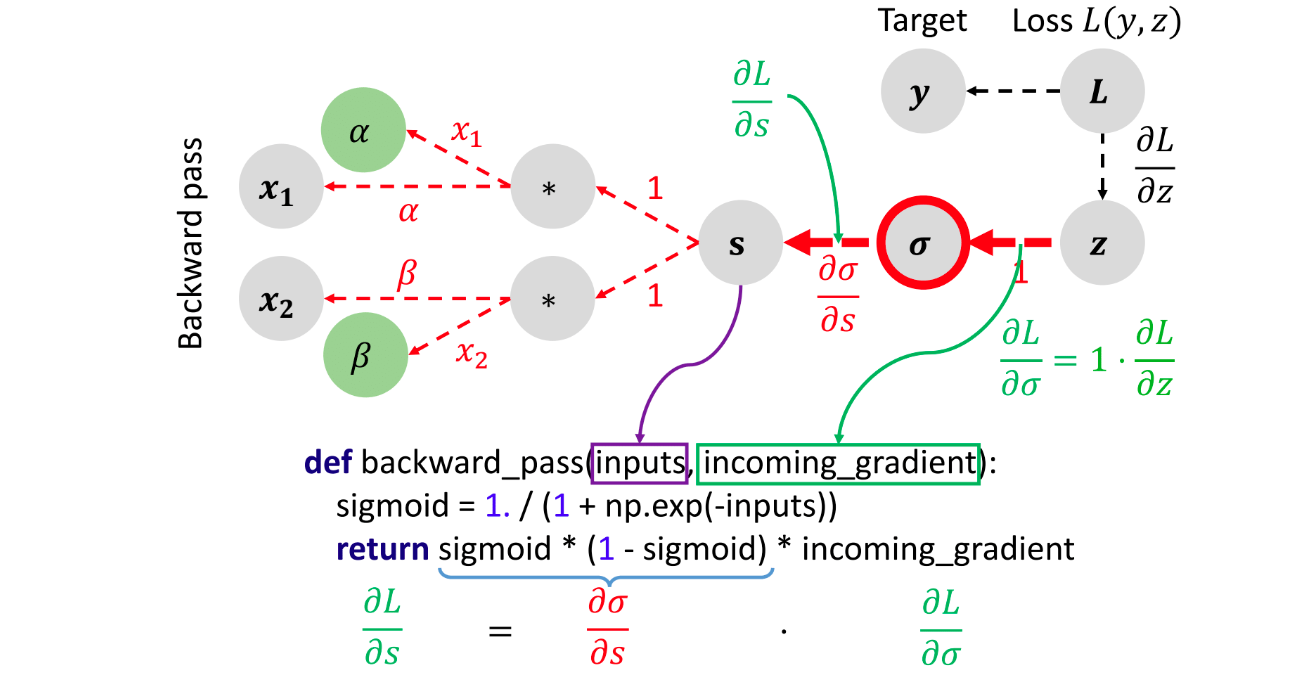